<a href="https://colab.research.google.com/github/pscabral/IFMASOFTEX_1/blob/main/01Untitled167.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mega.py

from mega import Mega

# Crie uma instância da classe Mega
mega = Mega()

# Cole o link completo do Mega.nz (incluindo a chave)
#url = "https://mega.nz/file/bEYUXaaD#XdMJFzQ8bD3CwD54ek9FSNR9Zkq03XjZgqiIFrUvKYs"
url = "https://mega.nz/file/2AYiUDwC#DOSlXbsOEBSE2xS5Vs2JS2N2XPaFMk0CISS1CXqlxj0"

# Use o link completo para fazer o download
mega.download_url(url)

!unzip Fruits 100.zip

In [ ]:
!unzip dataset_3.zip

In [ ]:
import os
import PIL
import glob
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from keras.models import load_model
from tensorflow.random import set_seed

In [ ]:
train_path = '../content/dataset_3/train'
val_path = '../content/dataset_3/val'
test_path = '../content/dataset_3/test'

In [ ]:
data_dicts = {
    'train':[],
    'test':[],
    'val':[]
}
data_labels = {
    'train':[],
    'test':[],
    'val':[]
}

In [ ]:
for phase in ['train','val','test']:
    if phase == 'train':
        data_dir = train_path
    elif phase == 'val':
        data_dir = val_path
    else:
        data_dir = test_path
    class_names = sorted(x for x in os.listdir(data_dir)
                            if os.path.isdir(os.path.join(data_dir, x)))
    num_class = len(class_names)
    image_files = [
        [
            os.path.join(data_dir, class_names[i], x)
            for x in os.listdir(os.path.join(data_dir, class_names[i]))
        ]
        for i in range(num_class)
    ]
    num_each = [len(image_files[i]) for i in range(num_class)]
    image_files_list = []
    image_class = []
    for i in range(num_class):
        image_files_list.extend(image_files[i])
        image_class.extend([i] * num_each[i])
    data_dicts[phase] = image_files_list
    data_labels[phase] = image_class
    num_total = len(image_class)
    image_width, image_height = PIL.Image.open(image_files_list[0]).size
    print(f"{phase} information")
    print(f"Image dimensions: {image_width} x {image_height}")
    print(f"Label names: {class_names}")
    print(f"Label counts: {num_each}")
    print(f"Total image count: {num_total}")
    print('--'*8)

train information
Image dimensions: 261 x 180
Label names: ['abiu', 'acai', 'acerola', 'ackee', 'ambarella', 'apple', 'apricot', 'avocado', 'banana', 'barbadine', 'barberry', 'betel_nut', 'bitter_gourd', 'black_berry', 'black_mullberry', 'brazil_nut', 'camu_camu', 'cashew', 'cempedak', 'chenet', 'cherimoya', 'chico', 'chokeberry', 'cluster_fig', 'coconut', 'corn_kernel', 'cranberry', 'cupuacu', 'custard_apple', 'damson', 'dewberry', 'dragonfruit', 'durian', 'eggplant', 'elderberry', 'emblic', 'feijoa', 'fig', 'finger_lime', 'gooseberry', 'goumi', 'grape', 'grapefruit', 'greengage', 'grenadilla', 'guava', 'hard_kiwi', 'hawthorn', 'hog_plum', 'horned_melon', 'indian_strawberry', 'jaboticaba', 'jackfruit', 'jalapeno', 'jamaica_cherry', 'jambul', 'jocote', 'jujube', 'kaffir_lime', 'kumquat', 'lablab', 'langsat', 'longan', 'mabolo', 'malay_apple', 'mandarine', 'mango', 'mangosteen', 'medlar', 'mock_strawberry', 'morinda', 'mountain_soursop', 'oil_palm', 'olive', 'otaheite_apple', 'papaya', 

In [ ]:
df = pd.DataFrame({'path': data_dicts['train'],'label': data_labels['train']})
sorted_counts  = df.value_counts('label')
fig = px.pie(names=class_names, values=sorted_counts, title="Class Distribution in Trainset", hole=0.3)
fig.show()

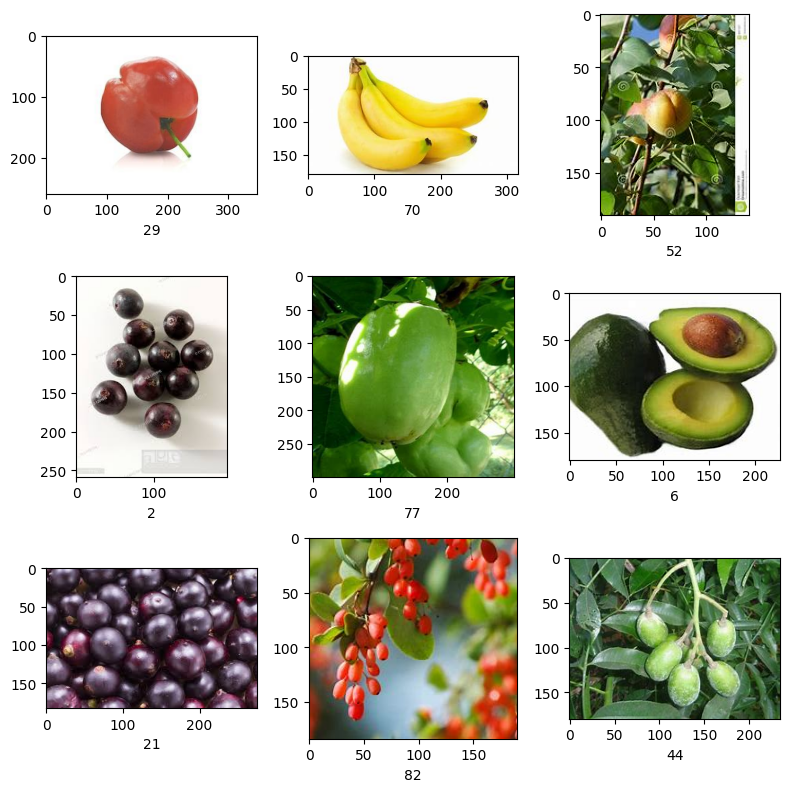

In [ ]:
plt.subplots(3, 3, figsize=(8, 8))
for i, k in enumerate(np.random.randint(num_total, size=9)):
    im = PIL.Image.open(data_dicts['train'][k])
    arr = np.array(im)
    plt.subplot(3, 3, i + 1)
    plt.xlabel(class_names[image_class[k]])
    plt.imshow(arr, vmin=0, vmax=255)
plt.tight_layout()
plt.show()

In [ ]:
batch_size = 32
data_generator = {
    'train':ImageDataGenerator(rescale=1/255.,width_shift_range=0.1,
                               height_shift_range=0.1,horizontal_flip=True,rotation_range=10),
    'val':ImageDataGenerator(rescale=1/255.,width_shift_range=0.1,
                               height_shift_range=0.1),
    'test':ImageDataGenerator(rescale=1/255.),
}

In [ ]:
data_sets = {
    'train':data_generator['train'].flow_from_directory(train_path,shuffle=True,class_mode='binary' ,batch_size=batch_size),
    'val':data_generator['val'].flow_from_directory(val_path,shuffle=False,class_mode='binary',batch_size=batch_size),
    'test':data_generator['test'].flow_from_directory(test_path,shuffle=False,class_mode='binary',batch_size=batch_size)
}

Found 40000 images belonging to 100 classes.
Found 5000 images belonging to 100 classes.
Found 5000 images belonging to 100 classes.


In [ ]:
for i,(images,labels) in enumerate(data_sets['train']):
    print('labels of first batch in trainset:',labels)
    print(labels.shape)
    print(images.shape)
    break

labels of first batch in trainset: [18. 51. 71. 97. 37. 47. 74. 70. 85. 56. 40. 63. 77. 14. 57. 64. 45. 19.
 37. 76. 49. 62. 50. 87. 12. 53. 67. 45. 62. 40. 31. 38.]
(32,)
(32, 256, 256, 3)


In [ ]:
def show_images(GRID=[3,3], model=None, size=(8,8), data=data_sets['train']):
    n_rows = GRID[0]
    n_cols = GRID[1]
    n_images = n_cols * n_rows

    i = 1
    plt.figure(figsize=size)
    for images, labels in data:
        id = np.random.randint(32)
        image, label = images[id], class_names[int(labels[id])]

        plt.subplot(n_rows, n_cols, i)
        plt.imshow(image)

        if model is None:
            title = f"Class : {label}"
        else:
            pred = class_names[int(np.argmax(model.predict(image[np.newaxis, ...])))]
            title = f"Org : {label}, Pred : {pred}"

        plt.title(title)
        plt.axis('off')

        i+=1
        if i>=(n_images+1):
            break

    plt.tight_layout()
    plt.show()

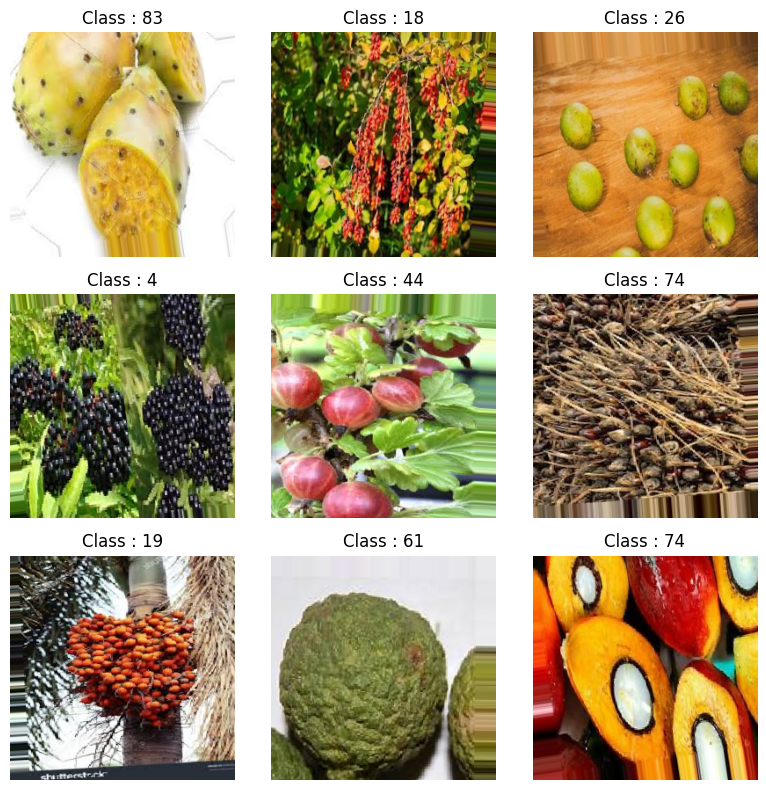

In [ ]:
show_images()

In [ ]:
pretrained = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=[256,256,3], include_top=False,
    classifier_activation='softmax',
)
pretrained.trainable = False
model = tf.keras.models.Sequential([
    pretrained,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 512)               655872    
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dense_5 (Dense)             (None, 100)               6500      
                                                                 
Total params: 2953188 (11.27 MB)
Trainable params: 695

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("final_model.h5", save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping( monitor="val_loss",patience=5, restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
epochs = 10
history = model.fit(data_sets['train'], validation_data=data_sets['val'],
                             epochs=epochs,callbacks=[checkpoint_callback,early_stopping_callback])

Epoch 1/10
1250/1250 [==============================] - ETA: 0s - loss: 2.1845 - accuracy: 0.4349

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



1250/1250 [==============================] - 1659s 1s/step - loss: 2.1845 - accuracy: 0.4349 - val_loss: 1.6682 - val_accuracy: 0.5424
Epoch 2/10
1250/1250 [==============================] - 1662s 1s/step - loss: 1.4040 - accuracy: 0.6040 - val_loss: 1.4530 - val_accuracy: 0.5984
Epoch 3/10
1250/1250 [==============================] - 1652s 1s/step - loss: 1.1783 - accuracy: 0.6567 - val_loss: 1.3501 - val_accuracy: 0.6200
Epoch 4/10
1250/1250 [==============================] - 1670s 1s/step - loss: 1.0335 - accuracy: 0.6967 - val_loss: 1.3429 - val_accuracy: 0.6330
Epoch 5/10
1250/1250 [==============================] - 1697s 1s/step - loss: 0.9190 - accuracy: 0.7248 - val_loss: 1.2719 - val_accuracy: 0.6526
Epoch 6/10
1250/1250 [==============================] - 1691s 1s/step - loss: 0.8425 - accuracy: 0.7436 - val_loss: 1.3122 - val_accuracy: 0.6456
Epoch 7/10
1250/1250 [==============================] - 1687s 1s/step - loss: 0.7641 - accuracy: 0.7660 - val_loss: 1.2818 - val_accura

In [ ]:
history_df = pd.DataFrame(history.history)

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,2.184480,0.434900,1.668212,0.5424
1,1.403968,0.604050,1.453049,0.5984
2,1.178303,0.656650,1.350100,0.6200
3,1.033499,0.696675,1.342855,0.6330
4,0.918986,0.724850,1.271879,0.6526
5,0.842486,0.743600,1.312174,0.6456
6,0.764148,0.765975,1.281758,0.6578
7,0.717963,0.778500,1.361053,0.6560
8,0.659986,0.793325,1.330268,0.6544
9,0.617310,0.805775,1.367185,0.6546


In [ ]:
line = px.line(data_frame= history_df ,y =["accuracy","val_accuracy"] , markers = True)
line.update_xaxes(title="epochs",
              rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_layout(showlegend = True,
    title = {
        'text': 'train acc Vs. val acc',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
line.show()

In [ ]:
line = px.line(data_frame= history_df ,y =["loss" , "val_loss"] , markers = True)
line.update_xaxes(title="epochs",
              rangeslider_visible = False)
line.update_yaxes(title = "Loss")
line.update_layout(showlegend = True,
    title = {
        'text': 'train loss Vs. val loss',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
line.show()

In [ ]:
model.save('mobileNet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
model_path = './mobileNet.h5'
model = load_model(model_path)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dense_2 (Dense)             (None, 36)                2340      
                                                                 
Total params: 2949028 (11.25 MB)
Trainable params: 69104

In [ ]:
score = model.evaluate(data_sets['test'])

12/12 [==============================] - 30s 2s/step - loss: 0.1865 - accuracy: 0.9359


In [ ]:
print('{}:{}'.format(model.metrics_names[1],score[1]*100))
print('{}:{}'.format(model.metrics_names[0],score[0]))

accuracy:93.59331727027893
loss:0.18647567927837372


1/1 [==============================] - 0s 65ms/step


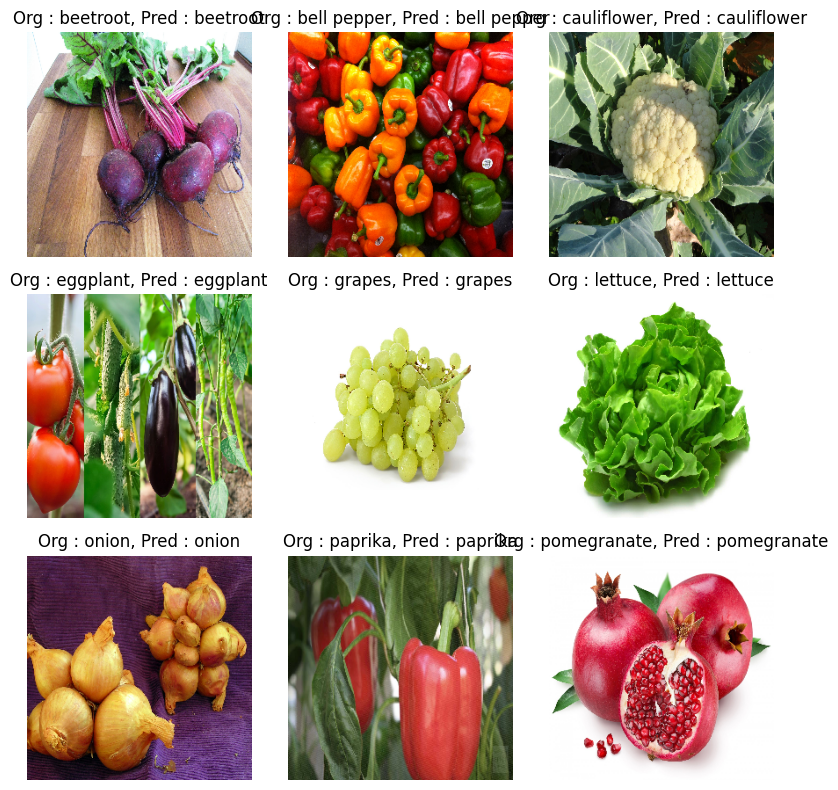

In [ ]:
show_images(model=model, data=data_sets['test'])

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Rótulos reais e rótulos previstos (substitua pelos seus dados reais e previstos)
label_names = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']

# Rótulos reais da primeira batch
actual_labels = [label_names[int(label)] for label in [2, 6, 18, 25, 13, 26, 28, 22, 32, 31, 12, 22, 5, 19, 29, 26, 4, 33, 34, 2, 17, 6, 20, 27, 33, 13, 19, 19, 11, 12, 27, 19]]

# Rótulos previstos (substitua pelos seus rótulos previstos)
predicted_labels = [label_names[int(label)] for label in [2, 6, 18, 25, 13, 26, 28, 22, 32, 31, 12, 22, 5, 19, 29, 26, 4, 33, 34, 2, 17, 6, 20, 27, 33, 13, 19, 19, 11, 12, 27, 19]]

# Gere o relatório de classificação
report = classification_report(actual_labels, predicted_labels)

# Imprima o relatório
print(report)

              precision    recall  f1-score   support

    beetroot       1.00      1.00      1.00         2
     cabbage       1.00      1.00      1.00         1
    capsicum       1.00      1.00      1.00         1
      carrot       1.00      1.00      1.00         2
    eggplant       1.00      1.00      1.00         1
      garlic       1.00      1.00      1.00         2
      ginger       1.00      1.00      1.00         2
       lemon       1.00      1.00      1.00         1
     lettuce       1.00      1.00      1.00         1
       mango       1.00      1.00      1.00         4
       onion       1.00      1.00      1.00         1
     paprika       1.00      1.00      1.00         2
   pineapple       1.00      1.00      1.00         1
 pomegranate       1.00      1.00      1.00         2
      potato       1.00      1.00      1.00         2
     raddish       1.00      1.00      1.00         1
   soy beans       1.00      1.00      1.00         1
   sweetcorn       1.00    

In [ ]:
classes = list(data_sets['test'].class_indices.keys())
real_classes = [classes[x] for x in data_sets['test'].labels]

pred = tf.argmax(model.predict(data_sets['test']),axis=1)
pred_classes = [classes[x] for x in pred]

12/12 [==============================] - 38s 3s/step


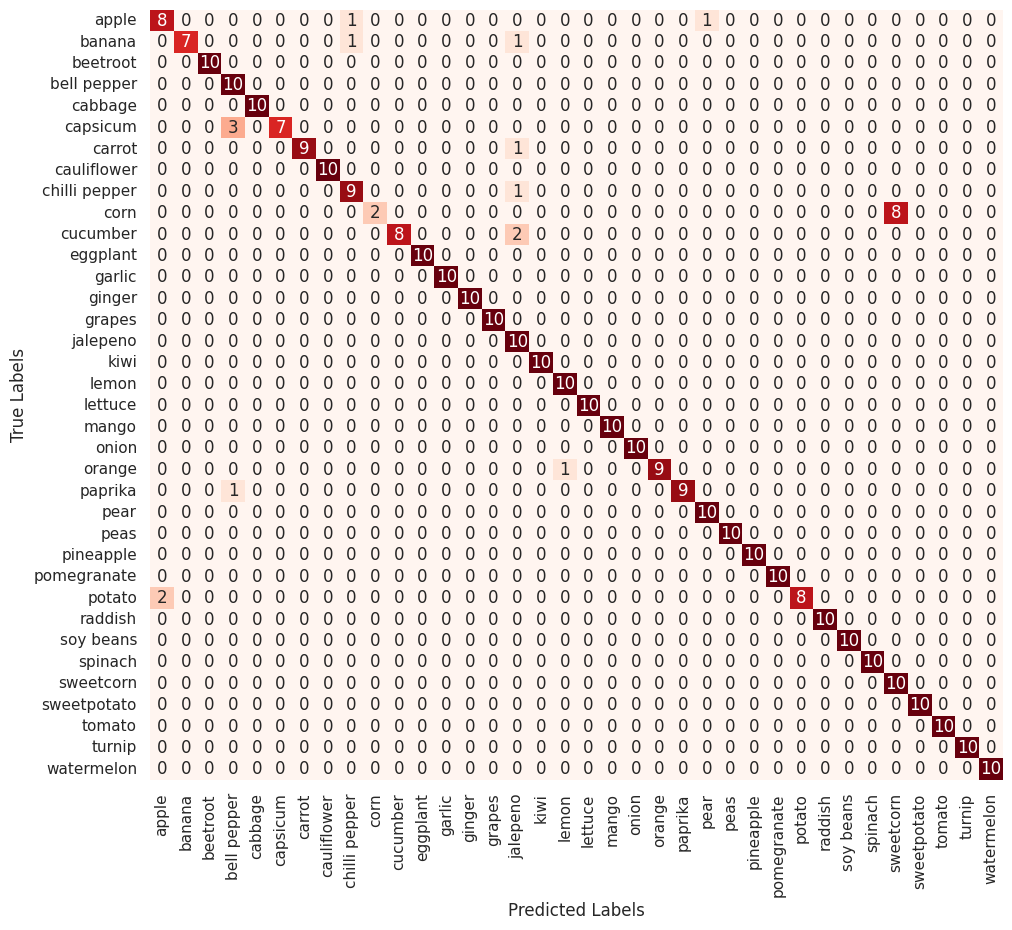

In [ ]:
cf_matrix = metrics.confusion_matrix(real_classes,pred_classes)
sns.set_theme(rc={'figure.figsize':(11,10)})
ax = sns.heatmap(cf_matrix,annot=True,cmap='Reds',fmt="g",xticklabels=classes,yticklabels=classes,cbar=False)
ax.set_ylabel('True Labels')
ax.set_xlabel('Predicted Labels');

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    confusion_matrix = confusion_matrix.astype(int)

    layout = {
        "title": "Confusion Matrix",
        "xaxis": {"title": "Predicted value"},
        "yaxis": {"title": "Real value"}
    }

    fig = go.Figure(data=go.Heatmap(z=confusion_matrix,
                                    x=class_names,
                                    y=class_names,
                                    hoverongaps=False,
                                   ),
                    layout=layout)
    fig.show()

In [ ]:
plot_confusion_matrix(real_classes,pred_classes,classes)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

# Carregue o modelo MobileNetV2 treinado
model = MobileNetV2(weights='imagenet')

# Carregue e pré-processe a imagem de entrada
img_path = '/content/0059.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # Ajuste o tamanho da imagem de acordo com o MobileNetV2
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Faça a inferência
predictions = model.predict(x)

# Decodifique as previsões
decoded_predictions = decode_predictions(predictions, top=5)[0]

# Imprima as previsões
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 [==============================] - 2s 2s/step
1: tailed_frog (0.20)
2: hog (0.11)
3: thunder_snake (0.07)
4: common_newt (0.06)
5: sunscreen (0.05)
